## Проект по созданию модели машинного обучения, предназначенной для классификации емейлов. Изначально дан датасет на 5728 строк, в котором 1 отмечены емейлы являющиеся спамом
В проекте используется классификатор Байеса а так же логистическая регрессия

Прочитаем данные, а так же импортируем некоторые зависимости

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('emails.csv')
print(df.shape)
df = df.sample(frac=1).reset_index(drop=True)

(5728, 2)


In [2]:
df.tail(15)

,text,spam
5713,"Subject: re : rice course thank you , see you...",0
5714,"Subject: re : weekly report vasant , yes , i...",0
5715,Subject: undelivered mail returned to sender ...,1
5716,Subject: candlestick charts fyi fallout - - ...,0
5717,Subject: black table for conference room and f...,0
5718,Subject: tw capacity options we ' re at the p...,0
5719,Subject: career opportunity dear mr . kaminsk...,0
5720,Subject: new stock : shooting stars stock repo...,1
5721,"Subject: followup patricia , i have forwarde...",0
5722,Subject: extra time - cures premature ejaculat...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


Определим, сколько писем в наборе данных являются спамом

In [4]:
df['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc0ef864850>,
 [Text(-0.8046353619747643, 0.7500412883700072, 'not spam'),
  Text(0.8046353619747643, -0.7500412883700073, 'spam')])

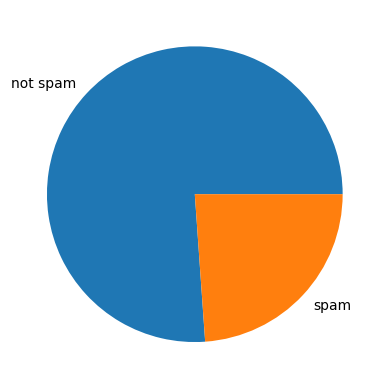

In [5]:
plt.pie(df['spam'].value_counts(), labels = ['not spam', 'spam'])

Используем инструменты nlp для обработки текста(отчистка, удаление знаков пунктуации и тд)

In [6]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import string

def count_words(text):
    words = word_tokenize(text)
    return len(words)

def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [8]:
#Пример, так же нужно применить эту функцию для всего набора данных
process_text('Subject: thank - you . . . dear dr . kaminski...')

'Subject thank dear dr kaminski'

In [9]:
df['text']=df['text'].apply(process_text)

In [10]:
df

,text,spam
0,Subject mg metals london research responsibili...,0
1,Subject information dear mr kaminski thank muc...,0
2,Subject friendly professional online pharmacy ...,1
3,Subject telephone interview enron research gro...,0
4,Subject moddeling support dpc related issues q...,0
...,...,...
5723,Subject know company lt really hard recollect ...,1
5724,Subject option hedging ees eugene bob discussi...,0
5725,Subject energy derivatives hi vince hope well ...,0
5726,Subject confidential yannis yes much please st...,0


### Теперь можно использовать стемминг Портера

In [11]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

df['text']=df['text'].apply(stemming)

In [12]:
df

,text,spam
0,subject mg metals london research responsibili...,0
1,subject information dear mr kaminski thank muc...,0
2,subject friendly professional online pharmacy ...,1
3,subject telephone interview enron research gro...,0
4,subject moddeling support dpc related issues q...,0
...,...,...
5723,subject know company lt really hard recollect ...,1
5724,subject option hedging ees eugene bob discussi...,0
5725,subject energy derivatives hi vince hope well ...,0
5726,subject confidential yannis yes much please st...,0


### Переведем текст в числа для последющей работы

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
mb = vectorizer.fit_transform(df['text'])

mb_array = mb.toarray()
print(f"shape is {mb_array.shape}")

shape is (5728, 37187)


### Делим на наборы данных(train, test), а так же создаем и обучаем Байесовский классификатор и выводим отчет по основным метрикам


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# train,test dataset
X_train,X_test,y_train,y_test = train_test_split(mb,df['spam'],test_size=0.33)

# Bayes
nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1460
           1       0.96      0.99      0.97       431

    accuracy                           0.99      1891
   macro avg       0.98      0.99      0.98      1891
weighted avg       0.99      0.99      0.99      1891



### Выведем визуально отчет по модели (confusion matrix)


### Обучим другую модель для сравнения


In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,C=1e4).fit(X_train, y_train)

In [19]:
y_predicted = clf.predict(X_test)

### Выводим отчет

In [20]:
from sklearn import metrics 
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1460
           1       0.97      0.97      0.97       431

    accuracy                           0.99      1891
   macro avg       0.98      0.98      0.98      1891
weighted avg       0.99      0.99      0.99      1891



In [21]:
print(f"Accurancy score {metrics.accuracy_score(y_test, y_predicted)}")
print(f"Precision score {metrics.precision_score(y_test, y_predicted)}")
print(f"Recall score {metrics.recall_score(y_test, y_predicted)}")
error = metrics.mean_squared_error(y_test, y_predicted)
print(f"MSE metric {error}")

Accurancy score 0.9862506610259122
Precision score 0.9698375870069605
Recall score 0.9698375870069605
MSE metric 0.013749338974087784
